In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import pandas as pd
import random
import shap

# For splitting dataset and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.decomposition import PCA

# For evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

/Users/user1/Data/mlops/asthma/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
dataset_path = '../data/asthma_detection/'

# The five categories/folders we have in the dataset
categories = ['Bronchial', 'pneumonia', 'asthma', 'healthy', 'copd']

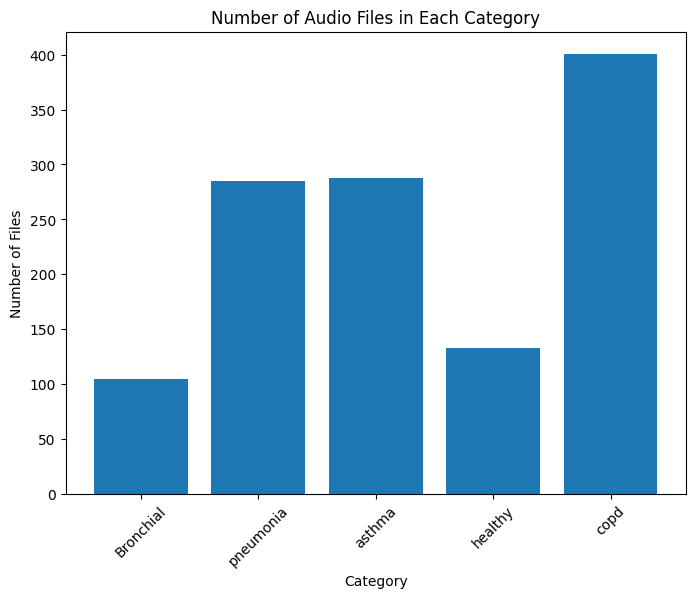

In [14]:
category_counts = {
    category: len([
        f for f in os.listdir(os.path.join(dataset_path, category)) 
        if f.endswith('.wav')
    ])
    for category in categories
}

# Plot a bar chart of category counts
plt.figure(figsize=(8, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Category')
plt.ylabel('Number of Files')
plt.title('Number of Audio Files in Each Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
table = PrettyTable()
table.field_names = ["Category", "Number of Audio Files"]
for category, count in category_counts.items():
    table.add_row([category, count])

print("Number of Audio Files in Each Category:")
print(table)

Number of Audio Files in Each Category:
+-----------+-----------------------+
|  Category | Number of Audio Files |
+-----------+-----------------------+
| Bronchial |          104          |
| pneumonia |          285          |
|   asthma  |          288          |
|  healthy  |          133          |
|    copd   |          401          |
+-----------+-----------------------+



=== Waveform Examples for Each Category ===


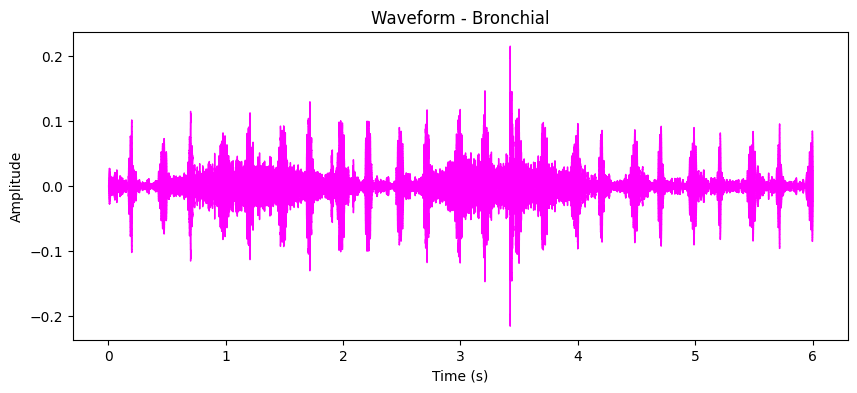

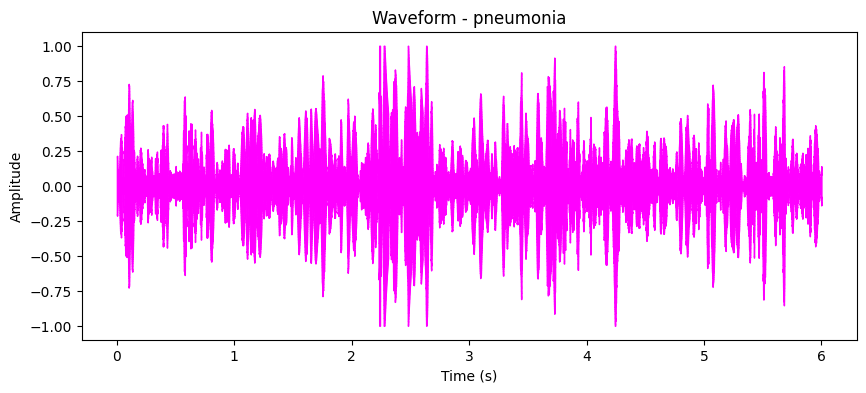

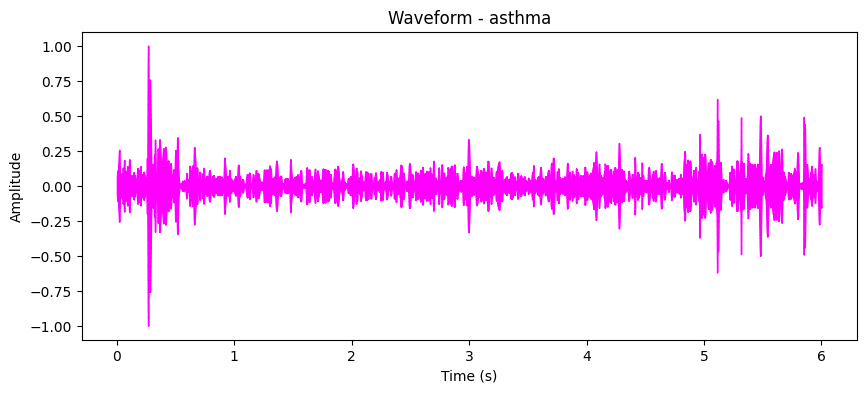

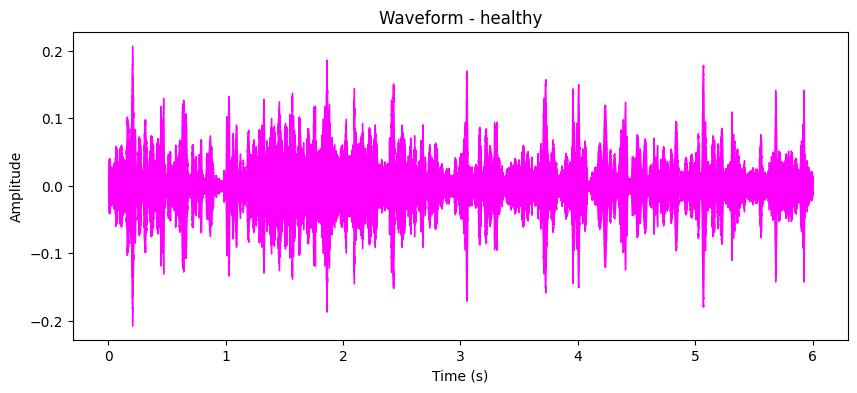

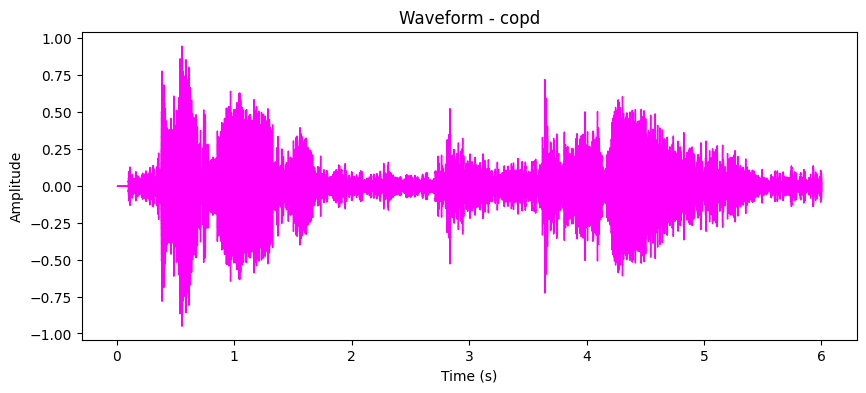

In [17]:
print("\n=== Waveform Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:  # just making sure we match exactly 5 categories
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            plt.figure(figsize=(10, 4))
            librosa.display.waveshow(y, sr=sr, color='magenta')
            plt.title(f'Waveform - {category}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()


=== Mel Spectrogram Examples for Each Category ===


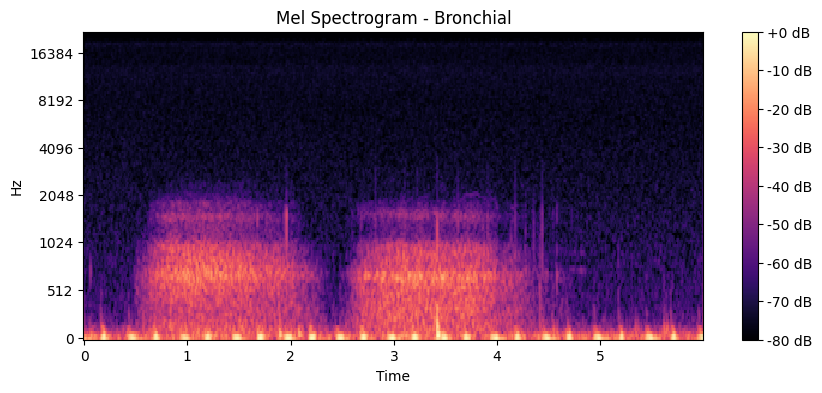

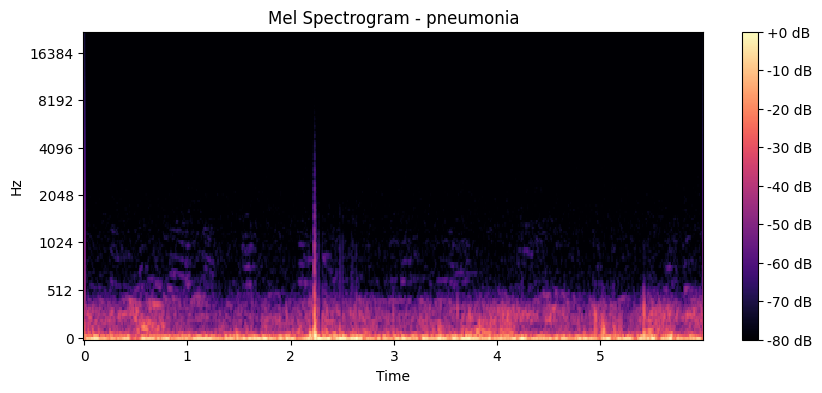

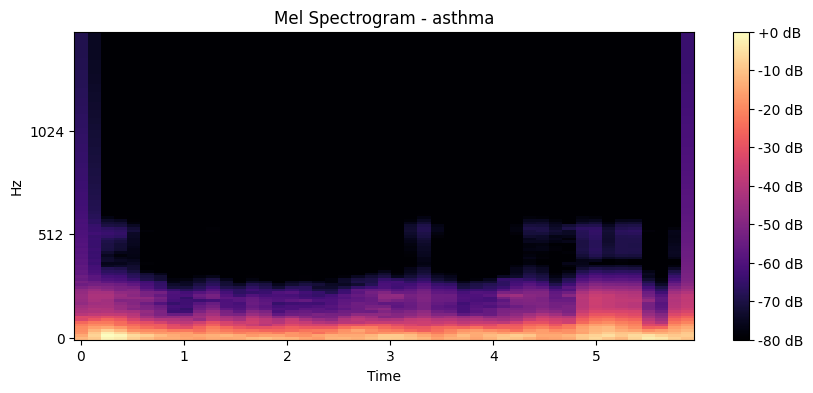

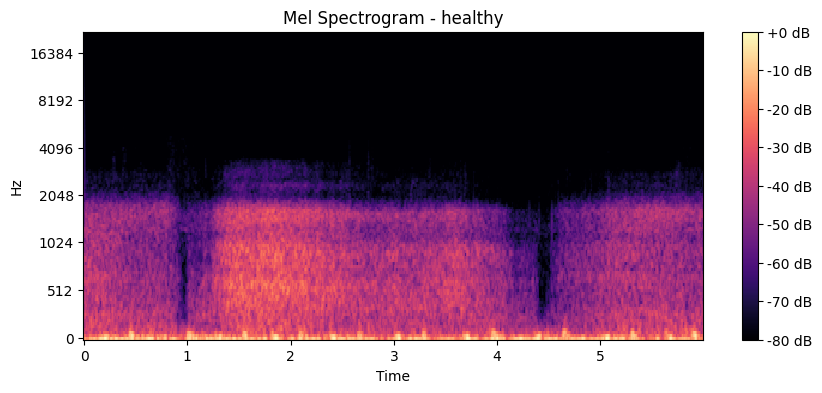

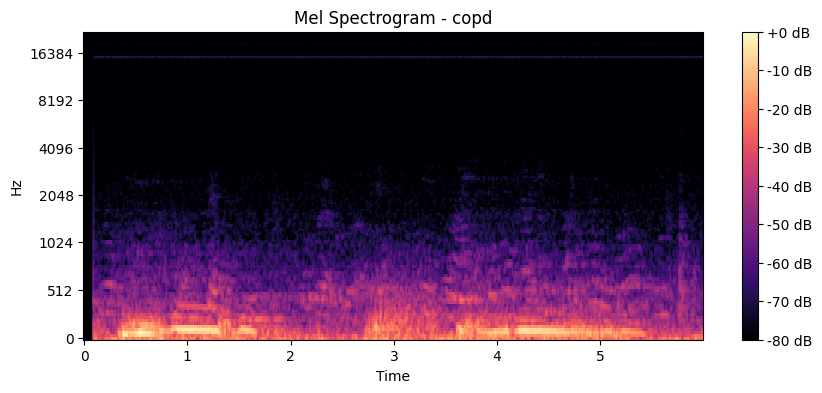

In [18]:
print("\n=== Mel Spectrogram Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Mel Spectrogram - {category}')
            plt.show()


=== MFCC Examples for Each Category ===


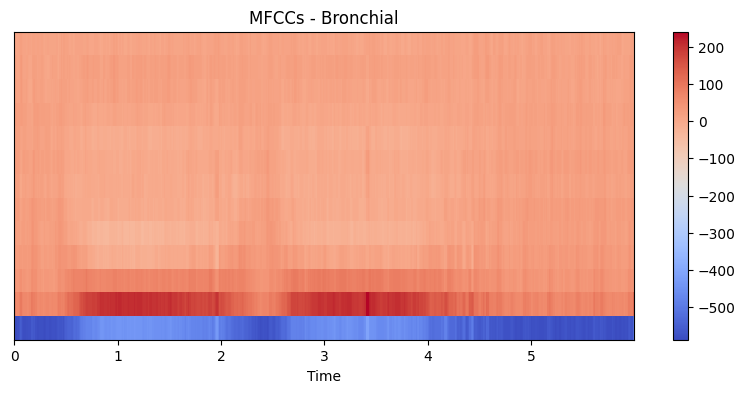

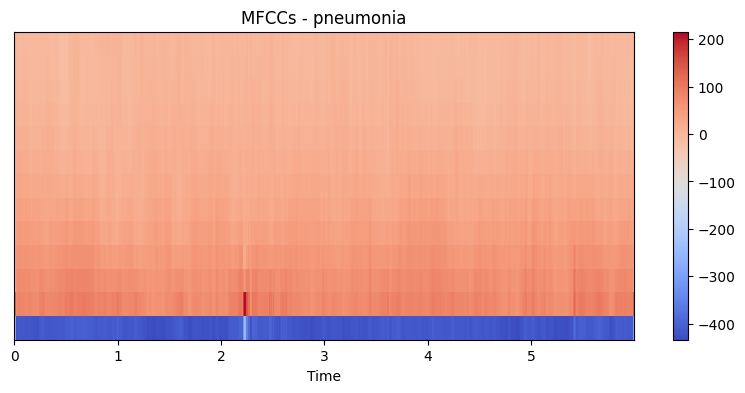

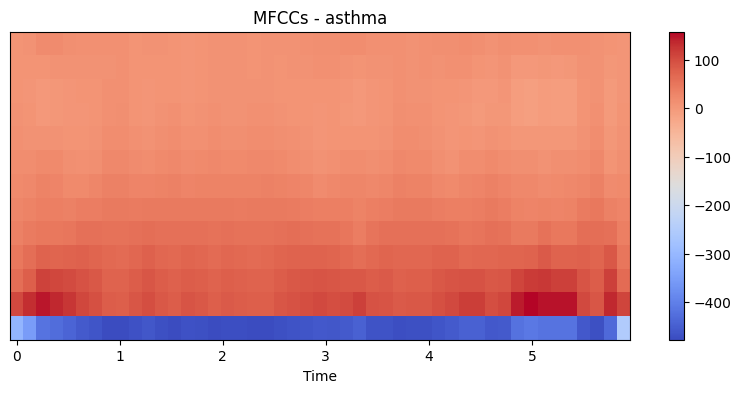

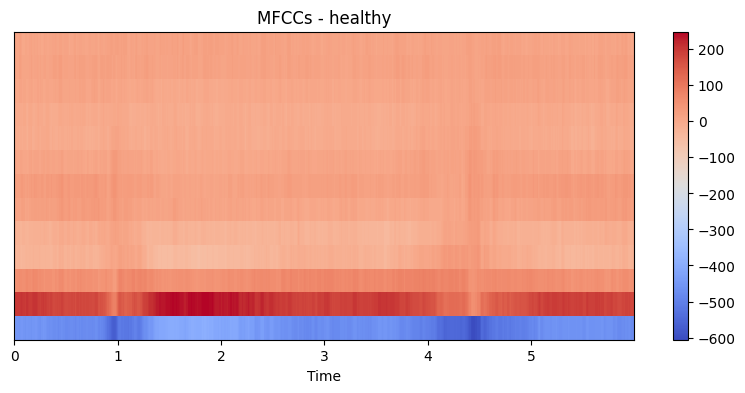

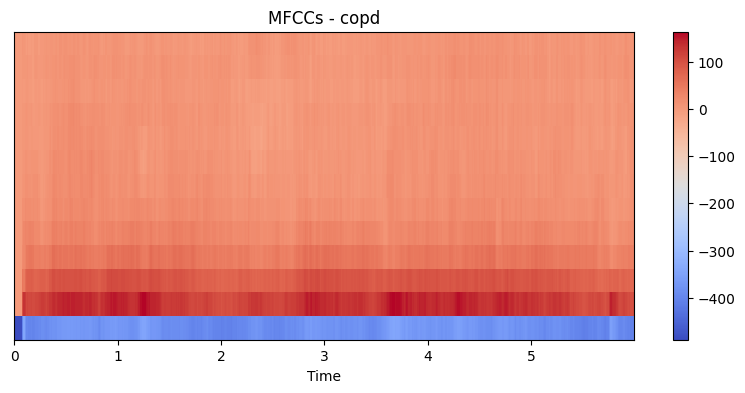

In [19]:
print("\n=== MFCC Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mfccs, sr=sr, x_axis='time')
            plt.colorbar()
            plt.title(f'MFCCs - {category}')
            plt.show()


=== Log Power Spectrogram Examples for Each Category ===


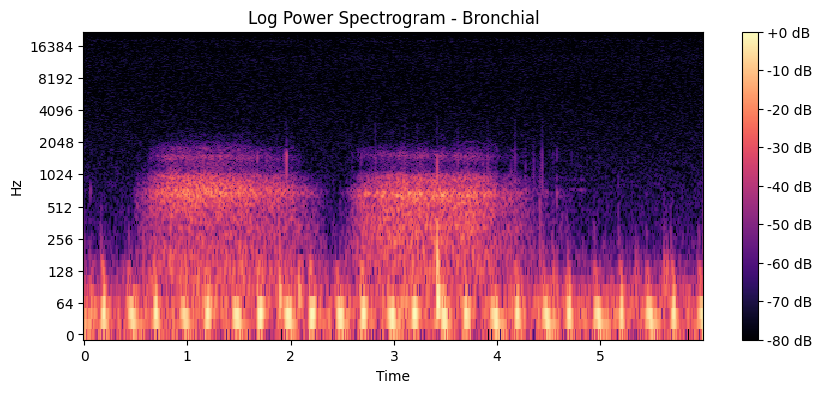

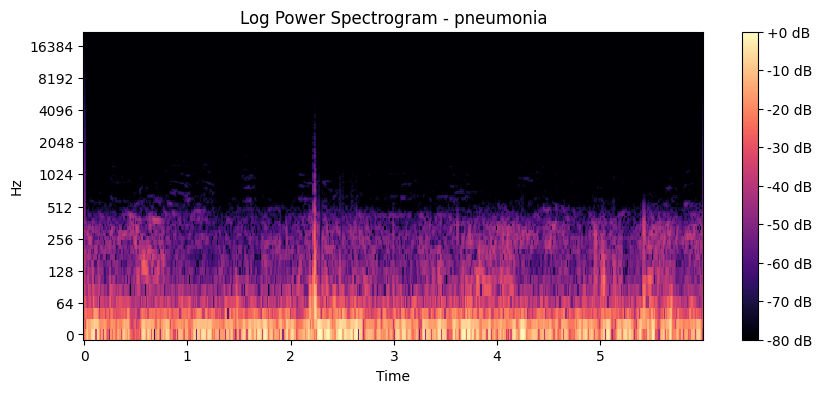

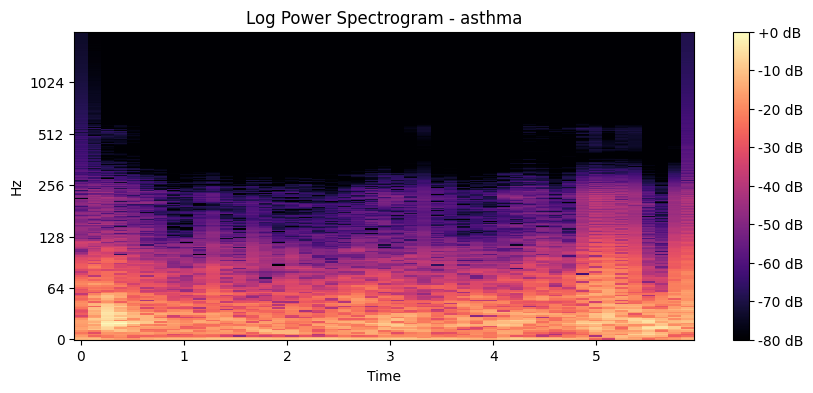

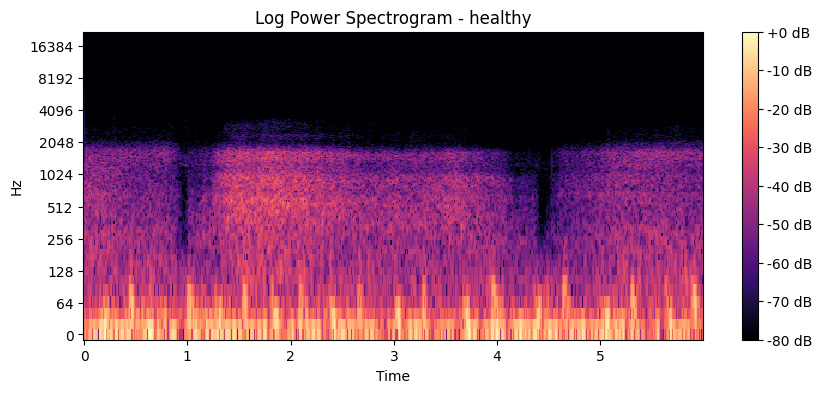

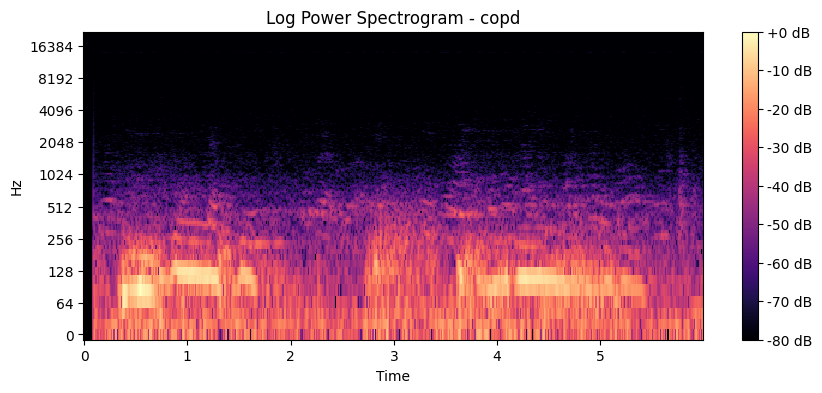

In [20]:
# Using STFT -> power_to_db -> specshow with y_axis='log'
print("\n=== Log Power Spectrogram Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            D = np.abs(librosa.stft(y))**2
            log_power_spectrogram = librosa.power_to_db(D, ref=np.max)

            plt.figure(figsize=(10, 4))
            librosa.display.specshow(
                log_power_spectrogram, sr=sr, x_axis='time', y_axis='log'
            )
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Log Power Spectrogram - {category}')
            plt.show()


=== Zero Crossing Rate Examples for Each Category ===


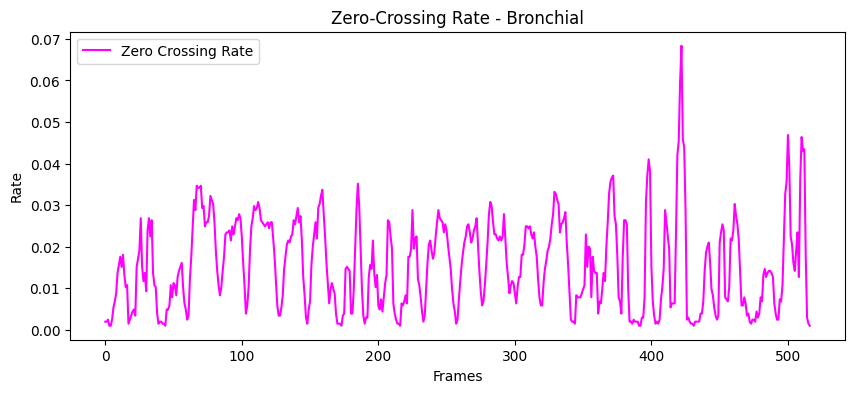

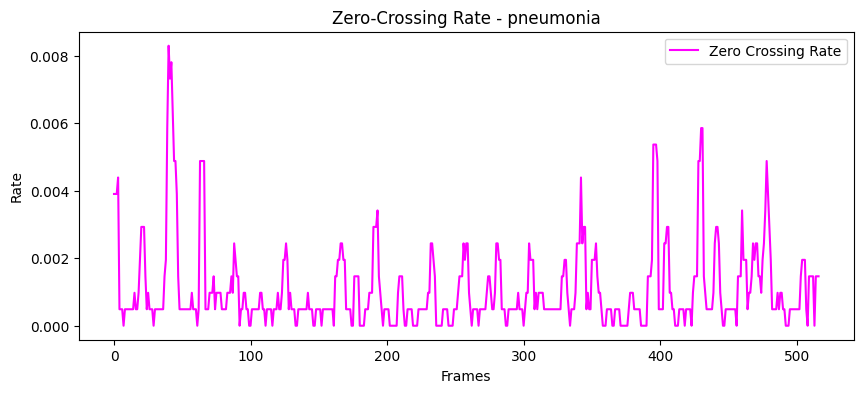

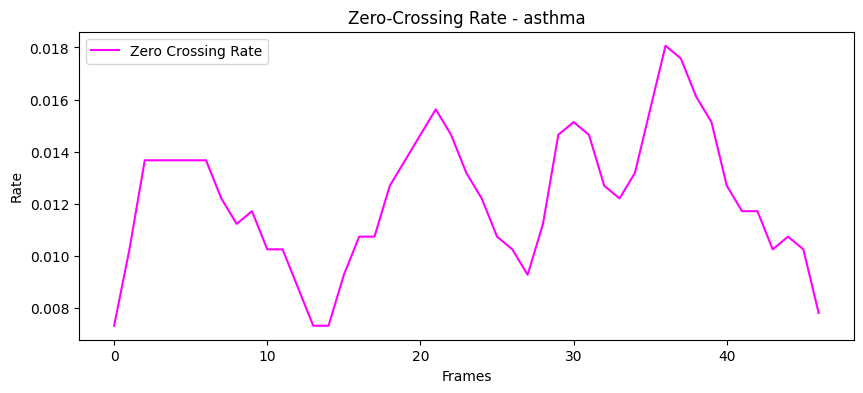

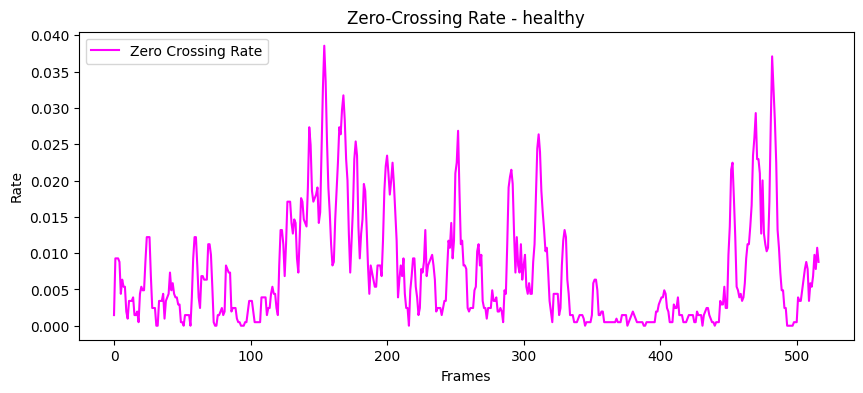

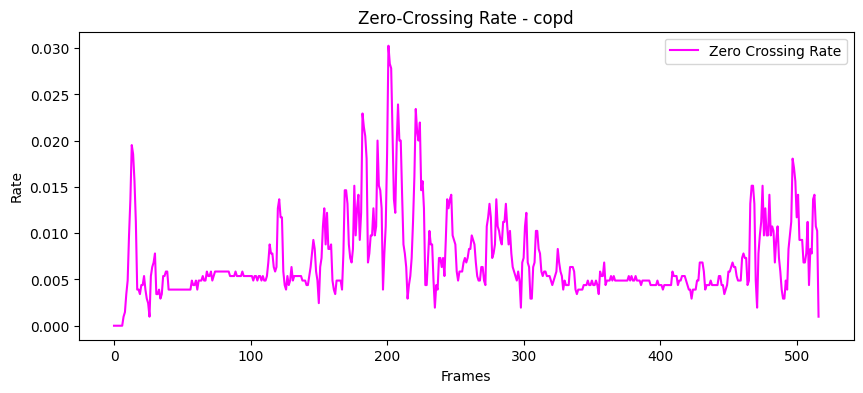

In [22]:
print("\n=== Zero Crossing Rate Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            zero_crossings = librosa.feature.zero_crossing_rate(y)[0]

            plt.figure(figsize=(10, 4))
            plt.plot(zero_crossings, color='magenta', label='Zero Crossing Rate')
            plt.xlabel('Frames')
            plt.ylabel('Rate')
            plt.title(f'Zero-Crossing Rate - {category}')
            plt.legend()
            plt.show()


=== Chroma Feature Examples for Each Category ===


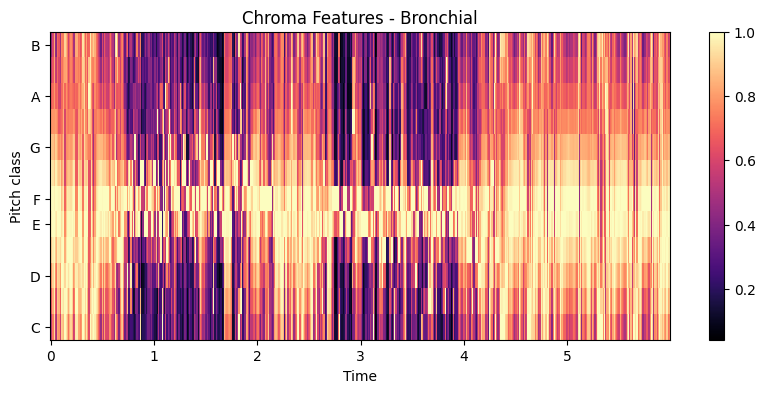

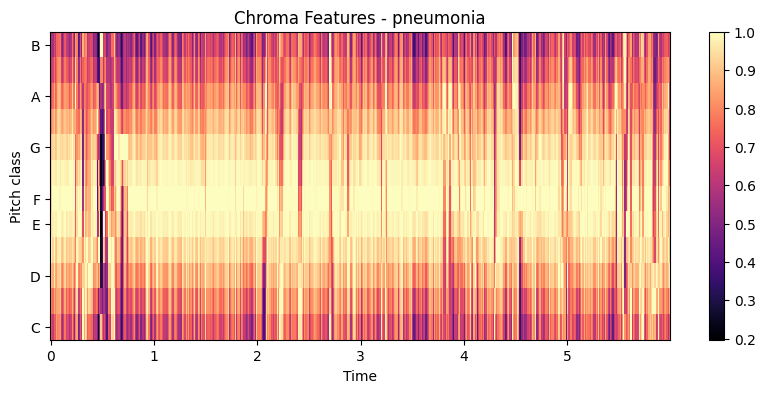

/Users/user1/Data/mlops/asthma/.venv/lib/python3.10/site-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


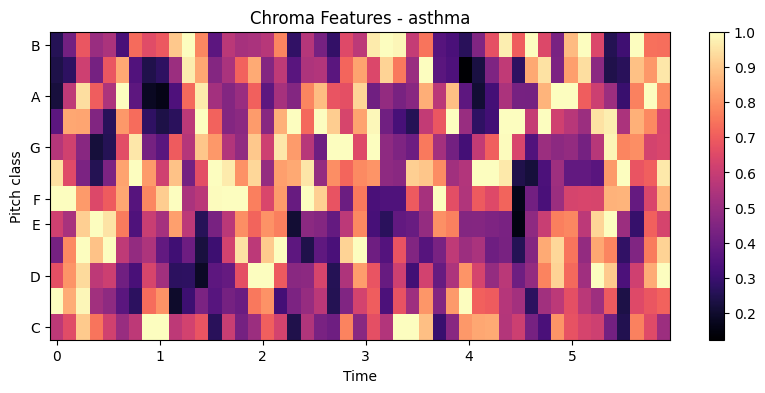

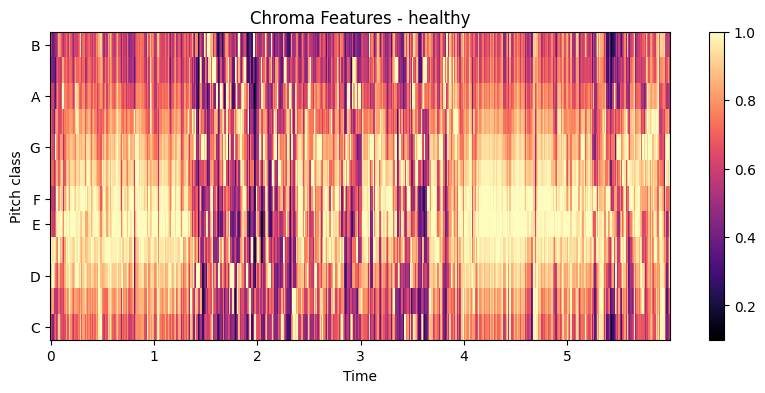

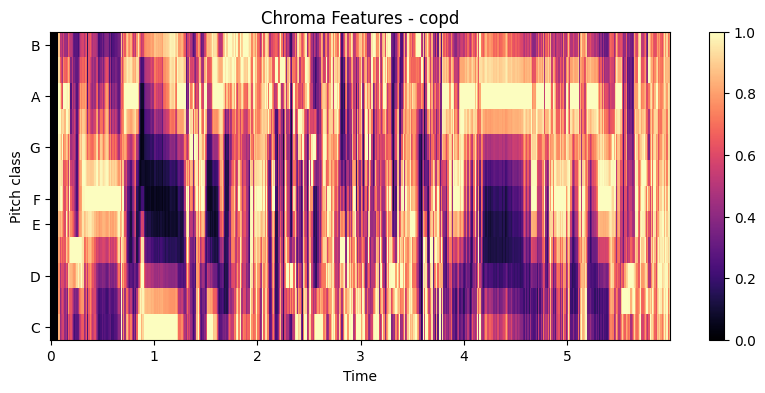

In [23]:
print("\n=== Chroma Feature Examples for Each Category ===")
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    audio_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
    if i < 5:
        if audio_files:
            audio_path = os.path.join(category_path, audio_files[0])
            y, sr = librosa.load(audio_path, sr=None)
            
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
            plt.colorbar()
            plt.title(f'Chroma Features - {category}')
            plt.show()


=== Distribution of Audio Durations by Category ===


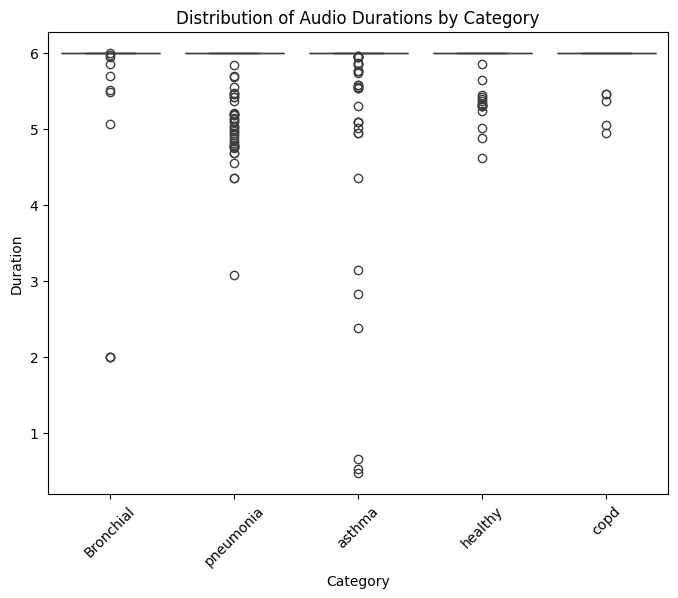

In [24]:
durations = []
labels = []

print("\n=== Distribution of Audio Durations by Category ===")
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for audio_file in os.listdir(category_path):
        if audio_file.endswith('.wav'):
            audio_path = os.path.join(category_path, audio_file)
            y, sr = librosa.load(audio_path, sr=None)
            durations.append(librosa.get_duration(y=y, sr=sr))
            labels.append(category)

df = pd.DataFrame({'Duration': durations, 'Category': labels})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Duration', data=df)
plt.title('Distribution of Audio Durations by Category')
plt.xticks(rotation=45)
plt.show()

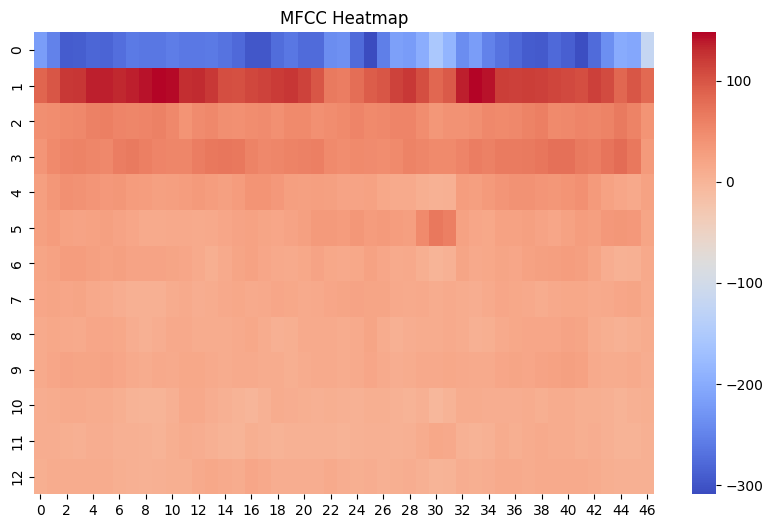

In [25]:
mfcc_sample = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 6))
sns.heatmap(mfcc_sample, cmap='coolwarm')
plt.title('MFCC Heatmap')
plt.show()

/Users/user1/Data/mlops/asthma/.venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(


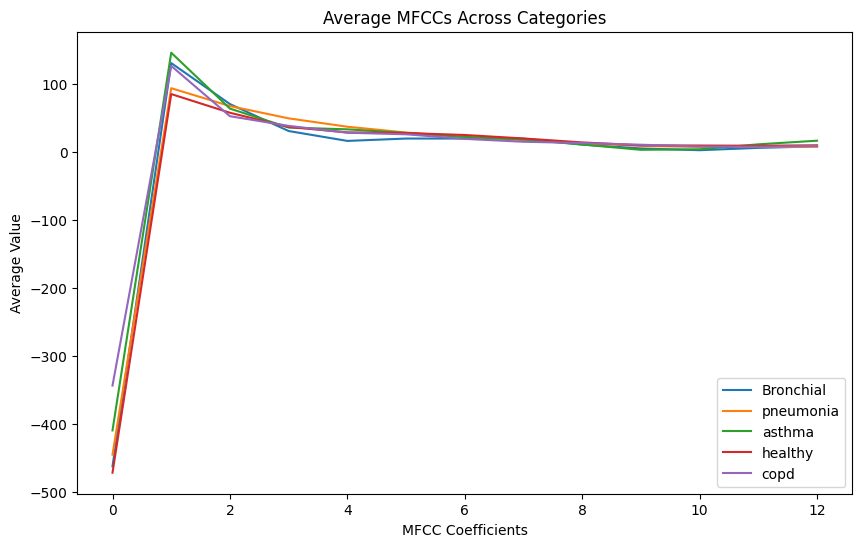

In [26]:
avg_mfccs = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    mfccs_for_cat = []
    for audio_file in os.listdir(category_path):
        if audio_file.endswith('.wav'):
            y_cat, sr_cat = librosa.load(os.path.join(category_path, audio_file), sr=None)
            mfcc_tmp = librosa.feature.mfcc(y=y_cat, sr=sr_cat, n_mfcc=13)
            mfccs_for_cat.append(np.mean(mfcc_tmp, axis=1))
    avg_mfccs.append(np.mean(mfccs_for_cat, axis=0))

plt.figure(figsize=(10, 6))
for i, avg_mfcc in enumerate(avg_mfccs):
    plt.plot(avg_mfcc, label=categories[i])
plt.title('Average MFCCs Across Categories')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Average Value')
plt.legend()
plt.show()


=== Amplitude Over Time (One sample per category) ===


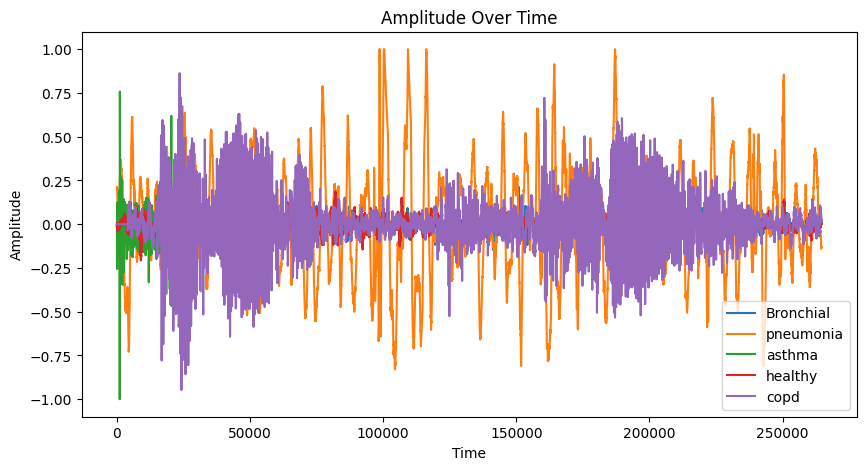

In [27]:
print("\n=== Amplitude Over Time (One sample per category) ===")
plt.figure(figsize=(10, 5))
for category in categories:
    audio_path = os.path.join(dataset_path, category, os.listdir(os.path.join(dataset_path, category))[0])
    y_cat, sr_cat = librosa.load(audio_path, sr=None)
    plt.plot(y_cat, label=category)

plt.title('Amplitude Over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


=== PCA Visualization of Audio Features ===


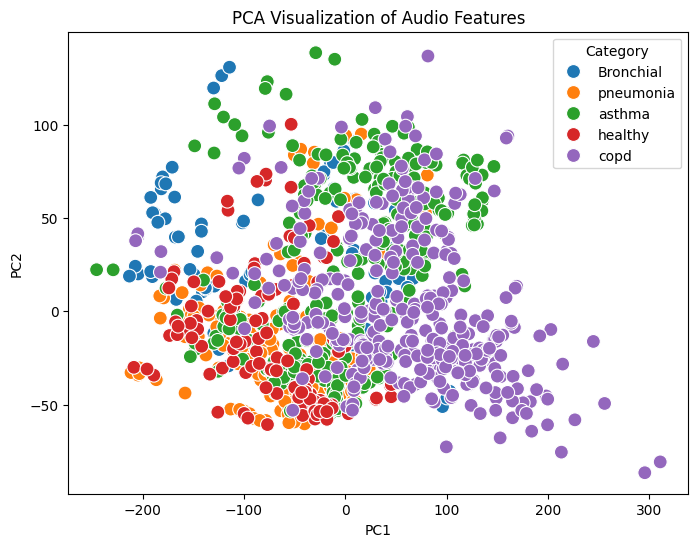

In [28]:
print("\n=== PCA Visualization of Audio Features ===")
pca_features = []
pca_labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for audio_file in os.listdir(category_path):
        if audio_file.endswith('.wav'):
            y_pca, sr_pca = librosa.load(os.path.join(category_path, audio_file), sr=None)
            mfcc_pca = librosa.feature.mfcc(y=y_pca, sr=sr_pca, n_mfcc=13)
            pca_features.append(np.mean(mfcc_pca, axis=1))
            pca_labels.append(category)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_features)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Category'] = pca_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Category', s=100)
plt.title('PCA Visualization of Audio Features')
plt.show()


=== Average Frequency Band Energy by Category ===


/Users/user1/Data/mlops/asthma/.venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(


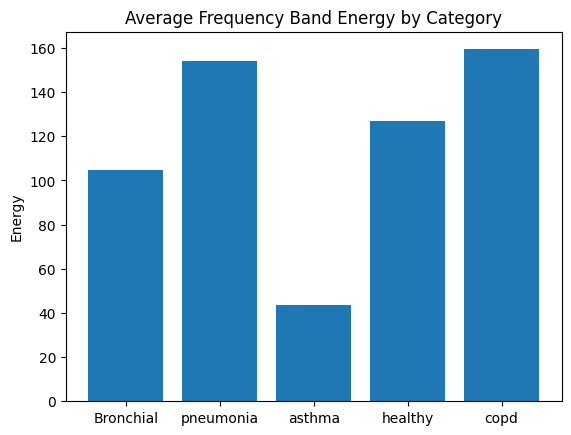

In [29]:
print("\n=== Average Frequency Band Energy by Category ===")
band_energies = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    energies = []
    for audio_file in os.listdir(category_path):
        if audio_file.endswith('.wav'):
            y_be, sr_be = librosa.load(os.path.join(category_path, audio_file), sr=None)
            stft = np.abs(librosa.stft(y_be))
            band_energy = np.sum(stft, axis=1)
            energies.append(np.mean(band_energy))
    band_energies.append(np.mean(energies))

plt.bar(categories, band_energies)
plt.title('Average Frequency Band Energy by Category')
plt.ylabel('Energy')
plt.show()